In [202]:
import statsmodels as sm
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import seaborn

In [4]:
data_df = pd.read_csv('analysis_env.csv')

In [17]:
data_df['date'] = pd.to_datetime(data_df['date'])

# Exploratory Data Analysis Based on Correlated Rank


In [6]:
corr_mat = data_df.corr()
corr_mat['power_gen'].abs().sort_values(ascending = False)

power_gen          1.000000
dswrf_sfc_10       0.796839
dswrf_sfc_1        0.793704
dswrf_sfc_3        0.786352
dswrf_sfc_9        0.773591
                     ...   
perturbation       0.068544
control            0.067097
Unnamed: 0         0.024781
forecast_loc_id    0.006933
latitude           0.003323
Name: power_gen, Length: 172, dtype: float64

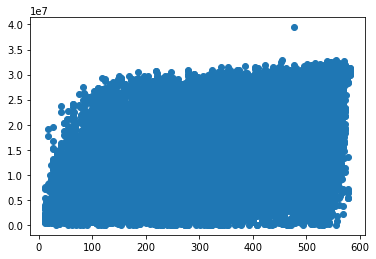

In [9]:
plt.scatter(data_df['dswrf_sfc_10'],data_df['power_gen'])

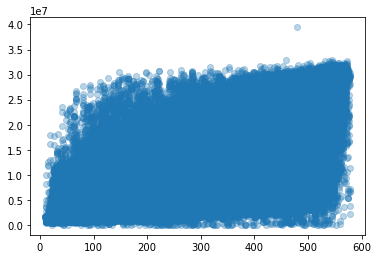

In [12]:
plt.scatter(data_df['dswrf_sfc_1'],data_df['power_gen'],alpha = 0.3)

In [26]:
sub[['dswrf_sfc_10','power_gen']].corr()['power_gen']['dswrf_sfc_10']

0.6360375078543775

In [49]:
def plot_monthly_corr(var_name):
    # does correlation become more clear during different months
    monthly_corrs = []
    for month in range(1,13):
        sub = data_df[data_df['date'].dt.month==month]
        corr_val = sub[[var_name,'power_gen']].corr()['power_gen'][var_name]
        monthly_corrs.append(corr_val)
        
    plt.plot(list(range(1,13)),monthly_corrs)
    xticks(list(range(1,13)), ['January', 'February', 'March','April','May','June','July','August','September','October','November','December'],
           rotation=20);
    plt.ylabel('Correlation')
    plt.xlabel('Month')
    plt.title('Monthly Correlation of {} and Power Generated'.format(var_name))

Variable	Description	Units

apcp_sfc	3-Hour accumulated precipitation at the surface	kg m-2

dlwrf_sfc	Downward long-wave radiative flux average at the surface	W m-2

dswrf_sfc	Downward short-wave radiative flux average at the surface	W m-2

pres_msl	Air pressure at mean sea level	Pa

pwat_eatm	Precipitable Water over the entire depth of the atmosphere	kg m-2

spfh_2m	Specific Humidity at 2 m above ground	kg kg-1

tcdc_eatm	Total cloud cover over the entire depth of the atmosphere	 %

tcolc_eatm	Total column-integrated condensate over the entire atmos.	kg m-2

tmax_2m	 Maximum Temperature over the past 3 hours at 2 m above the ground	 K

tmin_2m	 Mininmum Temperature over the past 3 hours at 2 m above the ground	 K

tmp_2m	 Current temperature at 2 m above the ground	 K

tmp_sfc	 Temperature of the surface	 K

ulwrf_sfc	 Upward long-wave radiation at the surface	 W m-2

ulwrf_tatm	 Upward long-wave radiation at the top of the atmosphere	 W m-2

uswrf_sfc	 Upward short-wave radiation at the surface	 W m-2

In [52]:
corr_mat['power_gen'].abs().sort_values(ascending = False).head(30)

power_gen       1.000000
dswrf_sfc_10    0.796839
dswrf_sfc_1     0.793704
dswrf_sfc_3     0.786352
dswrf_sfc_9     0.773591
dswrf_sfc_5     0.770870
dswrf_sfc_2     0.769821
dswrf_sfc_0     0.767505
dswrf_sfc_4     0.767453
dswrf_sfc_8     0.758983
dswrf_sfc_7     0.756089
dswrf_sfc_6     0.753969
uswrf_sfc_10    0.691915
uswrf_sfc_1     0.678836
uswrf_sfc_3     0.667555
uswrf_sfc_9     0.655433
uswrf_sfc_8     0.654869
uswrf_sfc_4     0.650523
uswrf_sfc_0     0.645935
uswrf_sfc_2     0.643757
uswrf_sfc_5     0.636056
tmp_sfc_2       0.633316
tmp_sfc_10      0.632762
tmp_sfc_4       0.632266
tmp_sfc_3       0.631166
uswrf_sfc_6     0.630860
tmp_sfc_6       0.629890
tmp_sfc_1       0.629001
uswrf_sfc_7     0.628762
tmp_sfc_8       0.628285
Name: power_gen, dtype: float64

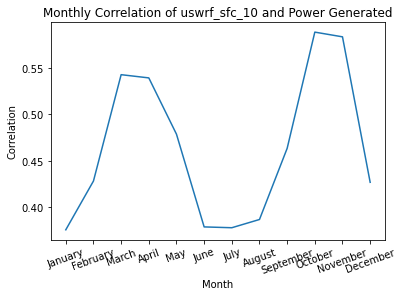

In [53]:
plot_monthly_corr('uswrf_sfc_10')

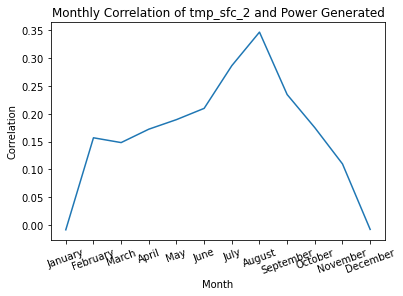

In [55]:
plot_monthly_corr('tmp_sfc_2')

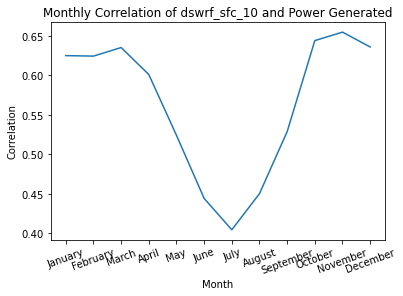

In [57]:
plot_monthly_corr('dswrf_sfc_10')

## Initial Modelling

In [60]:
# naive linear model 

import statsmodels.formula.api as sm

In [109]:
training_df = data_df[data_df['date'].dt.year!=2007]

mod = sm.ols(formula = 'power_gen ~ dswrf_sfc_10 +tmp_sfc_2 + uswrf_sfc_10',data = training_df)
mod = mod.fit()
data_df['ols_esimtated_power_gen'] = mod.predict(data_df)
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              power_gen   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                 2.266e+05
Date:                Thu, 12 Jan 2023   Prob (F-statistic):               0.00
Time:                        12:11:05   Log-Likelihood:            -6.2169e+06
No. Observations:              370344   AIC:                         1.243e+07
Df Residuals:                  370340   BIC:                         1.243e+07
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -2.71e+07   3.19e+05    -85.031      0.000   -2.77e+07   -2.65e+07
dswrf_sfc_10  4.014e+04    158.780    252.779      0.000    3.98e+04    4.04e+04
tmp_sfc_2     9.599e+04   1158.862     82.832      0.000    9.37e+04    9.83e+04
uswrf_sfc_10  1.509e+04    624.632     24.164      0.000    1.39e+04    1.63e+04
==============================================================================
Omnibus:                    54956.267   Durbin-Watson:                   1.457
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            97838.659
Skew:                          -0.967   Prob(JB):                         0.00
Kurtosis:                       4.612   Cond. No.                     1.97e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.97e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
data_df.groupby('solar_site_id').max()['power_gen'].sort_values(ascending=False)

solar_site_id
IDAB    39442800
HUGO    32823000
WOOD    32695500
ARNE    32645700
BYAR    32630700
          ...   
OKEM    30709200
BURN    30654600
CLAY    30585000
CHIC    30572400
MTHE    30415200
Name: power_gen, Length: 78, dtype: int64

In [111]:
data_07 = data_df[(data_df['date'].dt.year == 2007)&(data_df['solar_site_id']=='IDAB')]

<AxesSubplot:xlabel='date'>

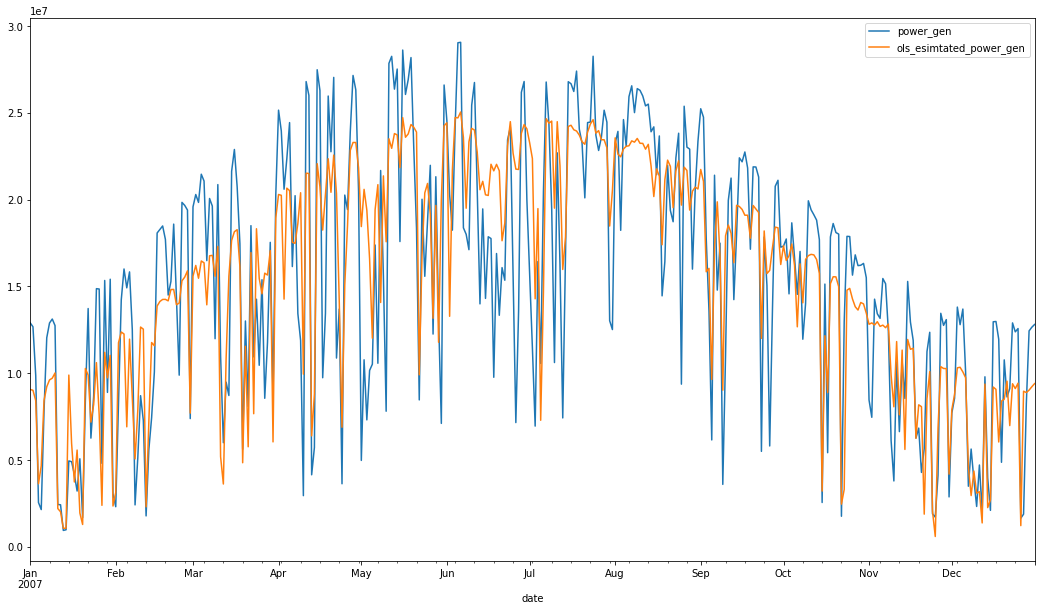

In [112]:
fig,ax = plt.subplots(figsize = [18,10])
data_07.groupby(['date']).mean()[['power_gen','ols_esimtated_power_gen']].plot(ax=ax)

In [113]:
data_07 = data_df[(data_df['date'].dt.year == 2007)]

<AxesSubplot:xlabel='date'>

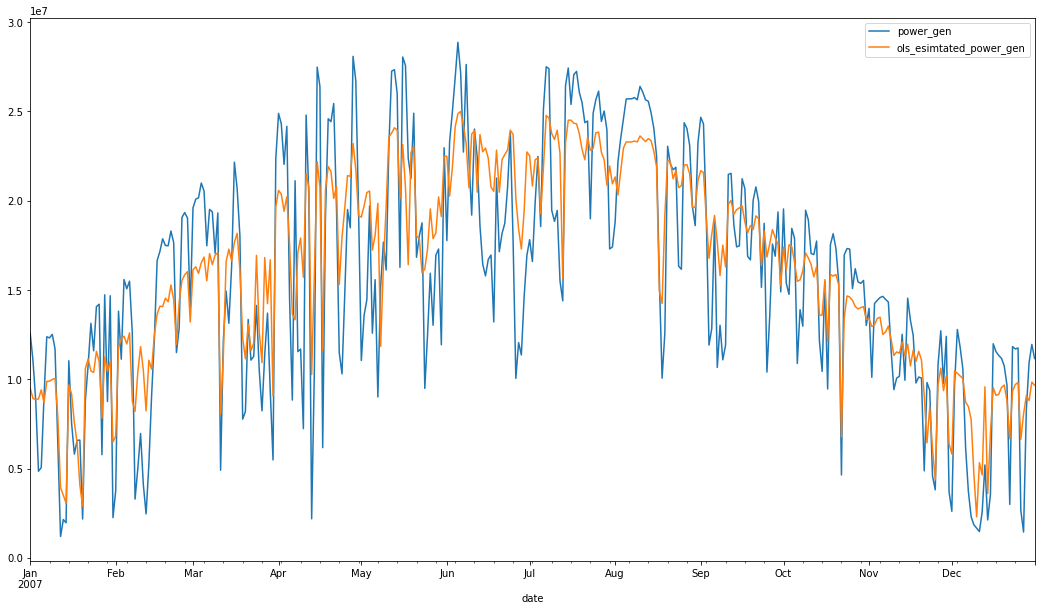

In [114]:
fig,ax = plt.subplots(figsize = [18,10])
data_07.groupby(['date']).mean()[['power_gen','ols_esimtated_power_gen']].plot(ax=ax)

/Users/maxfield/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
/Users/maxfield/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


<AxesSubplot:xlabel='date', ylabel='ols_esimtated_power_gen'>

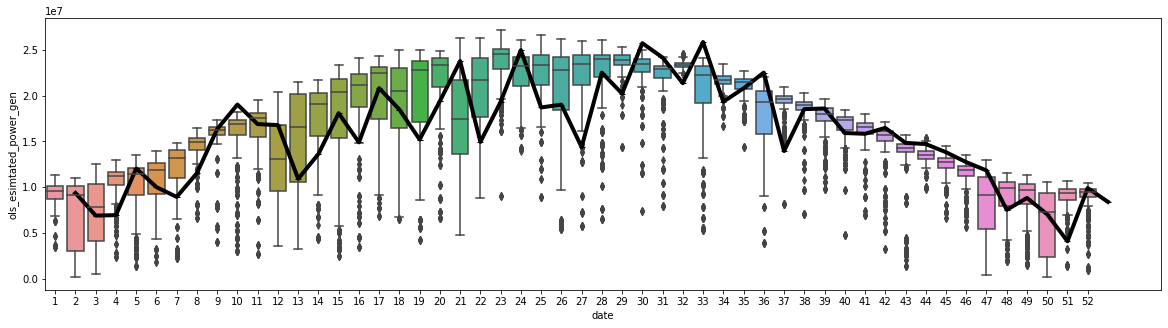

In [153]:
fig, ax = plt.subplots(figsize=(20,5))
seaborn.boxplot(x = data_07.date.dt.week,
                y = data_07['ols_esimtated_power_gen'], 
                ax = ax)
data_07.groupby(data_07.date.dt.week).mean()['power_gen'].plot(marker='_',ax=ax, color = 'black',linewidth=4)

In [171]:
plot_df = data_07[['date','power_gen','ols_esimtated_power_gen']]
df_stacked = data_07[['power_gen','ols_esimtated_power_gen']].stack().reset_index()
df_stacked['date'] = data_07.date.repeat(2).reset_index(drop=True)
df_stacked.columns = ['index_old','Legend','val','date']
df_stacked.index = df_stacked["date"]


/Users/maxfield/opt/anaconda3/envs/geospatial/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  


Text(0.5, 0, 'Week of the Year')

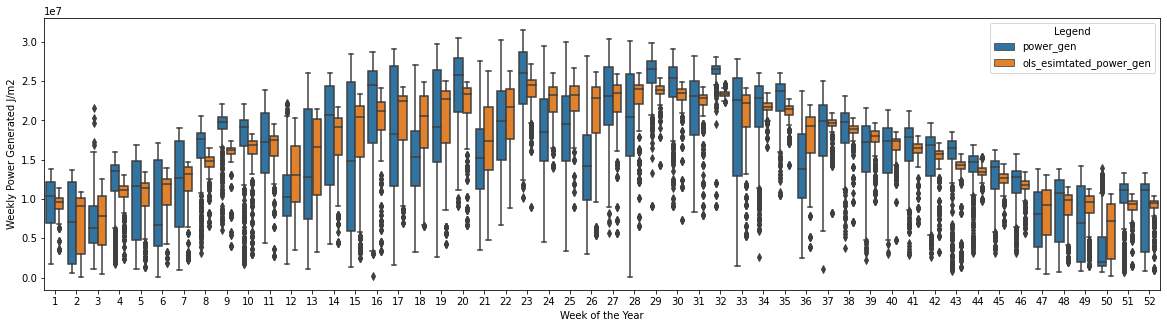

In [201]:
fig, ax = plt.subplots(figsize=(20,5))
seaborn.boxplot(x=df_stacked.index.week, y="val", hue="Legend", data=df_stacked,ax=ax)
plt.ylabel('Weekly Power Generated J/m2')
plt.xlabel('Week of the Year')